In [52]:
!pip install --upgrade albumentations

Requirement already up-to-date: albumentations in /home/chanda/anaconda3/lib/python3.7/site-packages (0.4.6)


In [53]:
import os
from PIL import Image
import numpy as np
import pandas as pd
import seaborn as sns
import cv2
from pylab import rcParams
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib import rc
import albumentations as A
from pandas.plotting import register_matplotlib_converters
import random

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [54]:
BOX_COLOR = (0, 0, 255)

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=1):
    x_min, y_min, x_max, y_max = map(lambda v: int(v), bbox)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

In [55]:
def show_image(image, bbox):
  image = visualize_bbox(image.copy(), bbox)
  f = plt.figure(figsize=(12, 12))
  plt.imshow(
    cv2.cvtColor(image, cv2.COLOR_BGR2RGB),
    interpolation='nearest'
  )
  plt.axis('off')
  f.tight_layout()
  plt.show()

In [74]:
form = cv2.imread("TEST/img2.png")
CROPPED_BBOX = [0.5, 0.20, 199, 198]

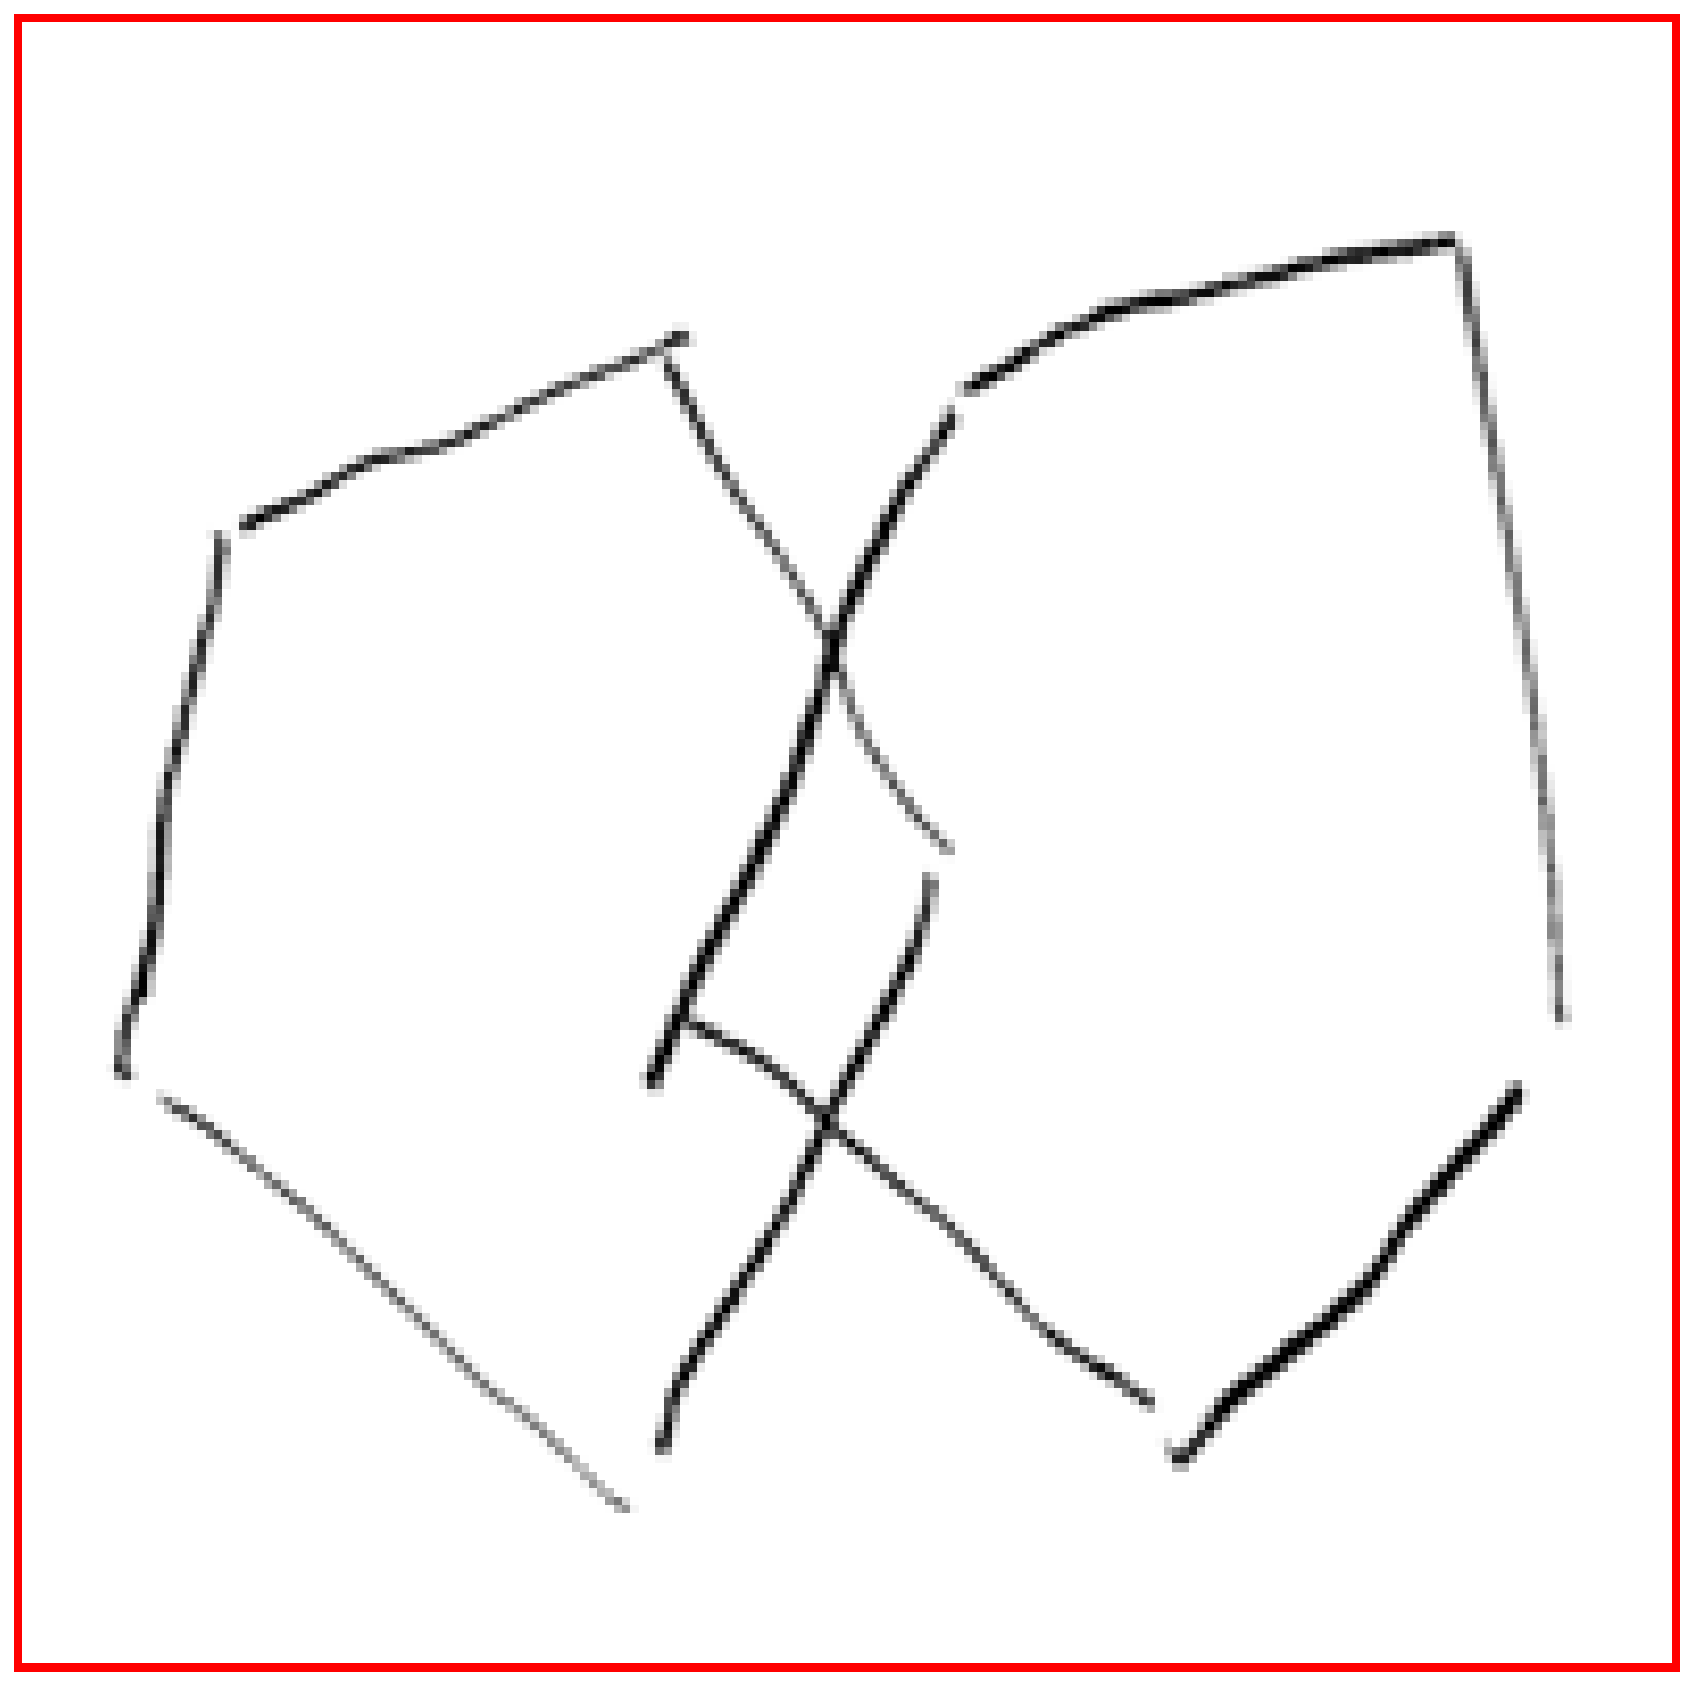

In [75]:
show_image(form, bbox=CROPPED_BBOX)

In [76]:
def show_augmented(augmentation, image, bbox):
  augmented = augmentation(image=image, bboxes=[bbox], field_id=['1'])
  show_image(augmented['image'], augmented['bboxes'][0])

In [77]:
bbox_params = A.BboxParams(
  format='pascal_voc', 
  min_area=1, 
  min_visibility=0.5, 
  label_fields=['field_id']
)

In [78]:
doc_aug = A.Compose([
    A.Flip(p=0.25),
    A.RandomGamma(gamma_limit=(20, 300), p=0.5),
    A.RandomBrightnessContrast(p=0.85),
    A.Rotate(limit=45, p=0.9),
    A.RandomRotate90(p=0.25),
    A.RGBShift(p=0.75),
    A.GaussNoise(p=0.25)
], bbox_params=bbox_params)

In [79]:
DATASET_PATH = 'MNIST/MMSE TYPES/y_train'
IMAGES_PATH = f'{DATASET_PATH}'

os.makedirs(DATASET_PATH, exist_ok=True)
os.makedirs(IMAGES_PATH, exist_ok=True)

rows = []
for i in tqdm(range(200)):
  augmented = doc_aug(image=form, bboxes=[CROPPED_BBOX], field_id=['1'])
  file_name = f'img2{i}.png'
    
    
  cv2.imwrite(f'{IMAGES_PATH}/{file_name}', augmented['image'])

100%|██████████| 200/200 [00:01<00:00, 166.41it/s]


In [86]:
IMG_DIR = 'data/augmented/images'

for img in os.listdir(IMG_DIR):
        img_array = cv2.imread(os.path.join(IMG_DIR,img), cv2.IMREAD_GRAYSCALE)

        img_array = (img_array.flatten())

        img_array  = img_array.reshape(-1, 1).T

        with open('y_train.csv', 'ab') as f:

            np.savetxt(f, img_array, delimiter=",")